Members:

Sreenjoy Mallick$\;\;\;\;\;\;$MBA19151<br>
Tejaswi Narayan$\;\;\;\;\;\;$MBA19219<br>
Sajal Kumar$\;\;\;\;\;\;\;\;\;\;\;$MBA19223 <br>
Sumit Anand$\;\;\;\;\;\;\;\;\;\;\;$MBA19234<br>
Yeduru Sowjanya $\;\;\;\;$MBA19245<br>
Saurabh Kukreti	$\;\;\;\;\;$MBA19257<br>

# 1. Business Understanding

A leading cause of illness and injury burden is cardiovascular disease. Despite major differences,
Cardiovascular disease is responsible for declines in cardiovascular mortality rates, almost 1 in 3 deaths, and 1 in 20 hospitalizations. It also accounts for about one tenth of the spending on hospitals.There is a significant effect on the quality of life and self-reported wellbeing of having cardiovascular disease. Those with cardiovascular disease, including diabetes, were four times more likely to report poor health than those without, higher than any other long-term condition.

About 17 million people worldwide are killed by cardiovascular diseases every year, and they mainly show up as myocardial infarctions and heart failure. Heart failure (HF) occurs when the heart is unable to pump enough blood to fulfil the body's needs. Patients' available electronic medical records measure signs, body characteristics, and clinical laboratory test values that can be used to conduct biostatistics analysis to illustrate trends and associations that are otherwise undetectable by medical doctors. In particular, machine learning can predict the survival of patients from their data and can individualise the most significant characteristics of those included in their medical records.

In [1]:
#loading some relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', palette="viridis", font_scale=1.5, rc={"figure.figsize": [8, 10]})

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

# 2. Data Understanding and Preparation

The dataset contains medical records of 299 heart failure patients.The patients consisted of 105 women and 194 men, and their ages range between 40 and 95 years old (Table 1). All 299 patients had left ventricular systolic dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

Source : https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [2]:
# loading the dataset
hf_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
# printing meta information
hf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [4]:
# changing the datatype of age to integer
hf_data['age'] = hf_data['age'].astype('int64')
hf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null int64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(2), int64(11)
memory usage: 30.4 KB


**Quantitative Statistical Description of data**

In [5]:
hf_data.describe().T

count           mean           std      min  \
age                       299.0      60.829431     11.894997     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

**Preparing a data dictionary for ease of understanding [1]**

In [6]:
labels = ['Age of the patient','If the patient has anaemia, 0:No 1:Yes','Level of the CPK enzyme in the blood',
          'If the patient has diabetes, 0:No 1:Yes','Percentage of blood leaving the heart at each contraction',
           'If a patient has hypertension, 0:No 1:Yes','Platelets in the blood',
          'Level of creatinine in the blood','Level of sodium in the blood','0:Woman 1: man','Is a smoker, 0:No, 1:Yes',
          'Follow-up period','If death occured during followup period 0:No 1:Yes']

In [7]:
measurement = ['Years','Boolean','mcg/L','Boolean','Percentage','Boolean','kiloplatelets/mL','mg/dL','mg/dL',
               'Boolean','Boolean','Days','Boolean']

In [10]:
hf_data_dict = pd.DataFrame({'Features':hf_data.columns,'Labels': labels,'Measurement':measurement})

In [11]:
hf_data_dict

Features  \
0                        age   
1                    anaemia   
2   creatinine_phosphokinase   
3                   diabetes   
4          ejection_fraction   
5        high_blood_pressure   
6                  platelets   
7           serum_creatinine   
8               serum_sodium   
9                        sex   
10                   smoking   
11                      time   
12               DEATH_EVENT   

                                               Labels       Measurement  
0                                  Age of the patient             Years  
1              If the patient has anaemia, 0:No 1:Yes           Boolean  
2                Level of the CPK enzyme in the blood             mcg/L  
3             If the patient has diabetes, 0:No 1:Yes           Boolean  
4   Percentage of blood leaving the heart at each ...        Percentage  
5           If a patient has hypertension, 0:No 1:Yes           Boolean  
6                              Platelets in the blood  kiloplatelets/mL  
7                    Level of creatinine in the blood             mg/dL  
8                        Level of sodium in the blood             mg/dL  
9                                      0:Woman 1: man           Boolean  
10                           Is a smoker, 0:No, 1:Yes           Boolean  
11                                   Follow-up period              Days  
12  If death occured during followup period 0:No 1...           Boolean

In [12]:
hf_data_dict.to_csv("Data Dictionary.csv", index = False) # saving for future use

**Further Descriptions**

**Anameia** : If the hematocrit levels were less than 36% then classified as No. Hematocrit is the volume percentage of Red Blood Cells in blood[2].<br><br>
**Creatininine Phosphokinase**: Acronymed as CPK, this enzyme is an indicator of heart failure.CPK flows into the blood upon damage to a muscle tissue. Higher levels of CPK in blood might indicate a heart failure[3].<br><br>
**Ejection Fraction**: Ejection fraction, expressed as a percentage measures how much blood is pumped out by the left ventricle with each contraction. This indicates how well the heart is at pumping out blood. It aids in diagnosis and track heart failure[4].<br><br>
**Platelets** : Platelets are specialized disk-shaped cells in the blood stream that are involved in the formation of blood clots that play an important role in heart attacks, strokes, and peripheral vascular disease.Platelets can detect a disruption in the lining of a blood vessel and react to build a wall to stop bleeding[5].<br><br>
**Serum Creatinine**: Serum Creatinine is a blood chemical waste product generated on muscle breakdown. It is associated with functioning of kidney. High levels of serum createnine indicate renal dysfunction.Renal dysfunction has shown to influence heart failure[6]. <br><br>
**Serum Sodium**: Sodium is a type of electrolyte. An electrolyte is a charged mineral that aids correct functioning of muscles and nerves. This is done by maintainging a balance in fluid levels and chemicals(acid & bases) in the body. An abnormally low level of sodium might be caused by heart failure [7]. <br><br>


**Sepearting the features into numerical and categorical** 

The data has been seperated according to the nature of features. This will help in better analysis. Which type of plots to use for visualising can be determined by the type of data. Also, the type of hypothesis tests to use could be easily identified once there is a clarity regarding the data type.  

According to our dataset:<br><br>
    **Numerical Attributes** - age, creatinine_phosphokinase, ejection_fraction,platelets, serum_creatinine, serum_sodium,time <br><br>
    **Categorical Attributes** - anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT

In [13]:
numerical = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium','time']

categorical = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']

In [14]:
hf_data_EDA = hf_data[numerical + categorical]
hf_data_EDA.head()

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75                       582                 20  265000.00   
1   55                      7861                 38  263358.03   
2   65                       146                 20  162000.00   
3   50                       111                 20  210000.00   
4   65                       160                 20  327000.00   

   serum_creatinine  serum_sodium  time  anaemia  diabetes  \
0               1.9           130     4        0         0   
1               1.1           136     6        0         0   
2               1.3           129     7        0         0   
3               1.9           137     7        1         0   
4               2.7           116     8        1         1   

   high_blood_pressure  sex  smoking  DEATH_EVENT  
0                    1    1        0            1  
1                    0    1        0            1  
2                    0    1        1            1  
3                    0    1        0            1  
4                    0    0        0            1

## 2.1 Exploratory Data Analysis

### 2.1.1 Univariate Analysis

**Numerical Features**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002278AD48828>,
      dtype=object)

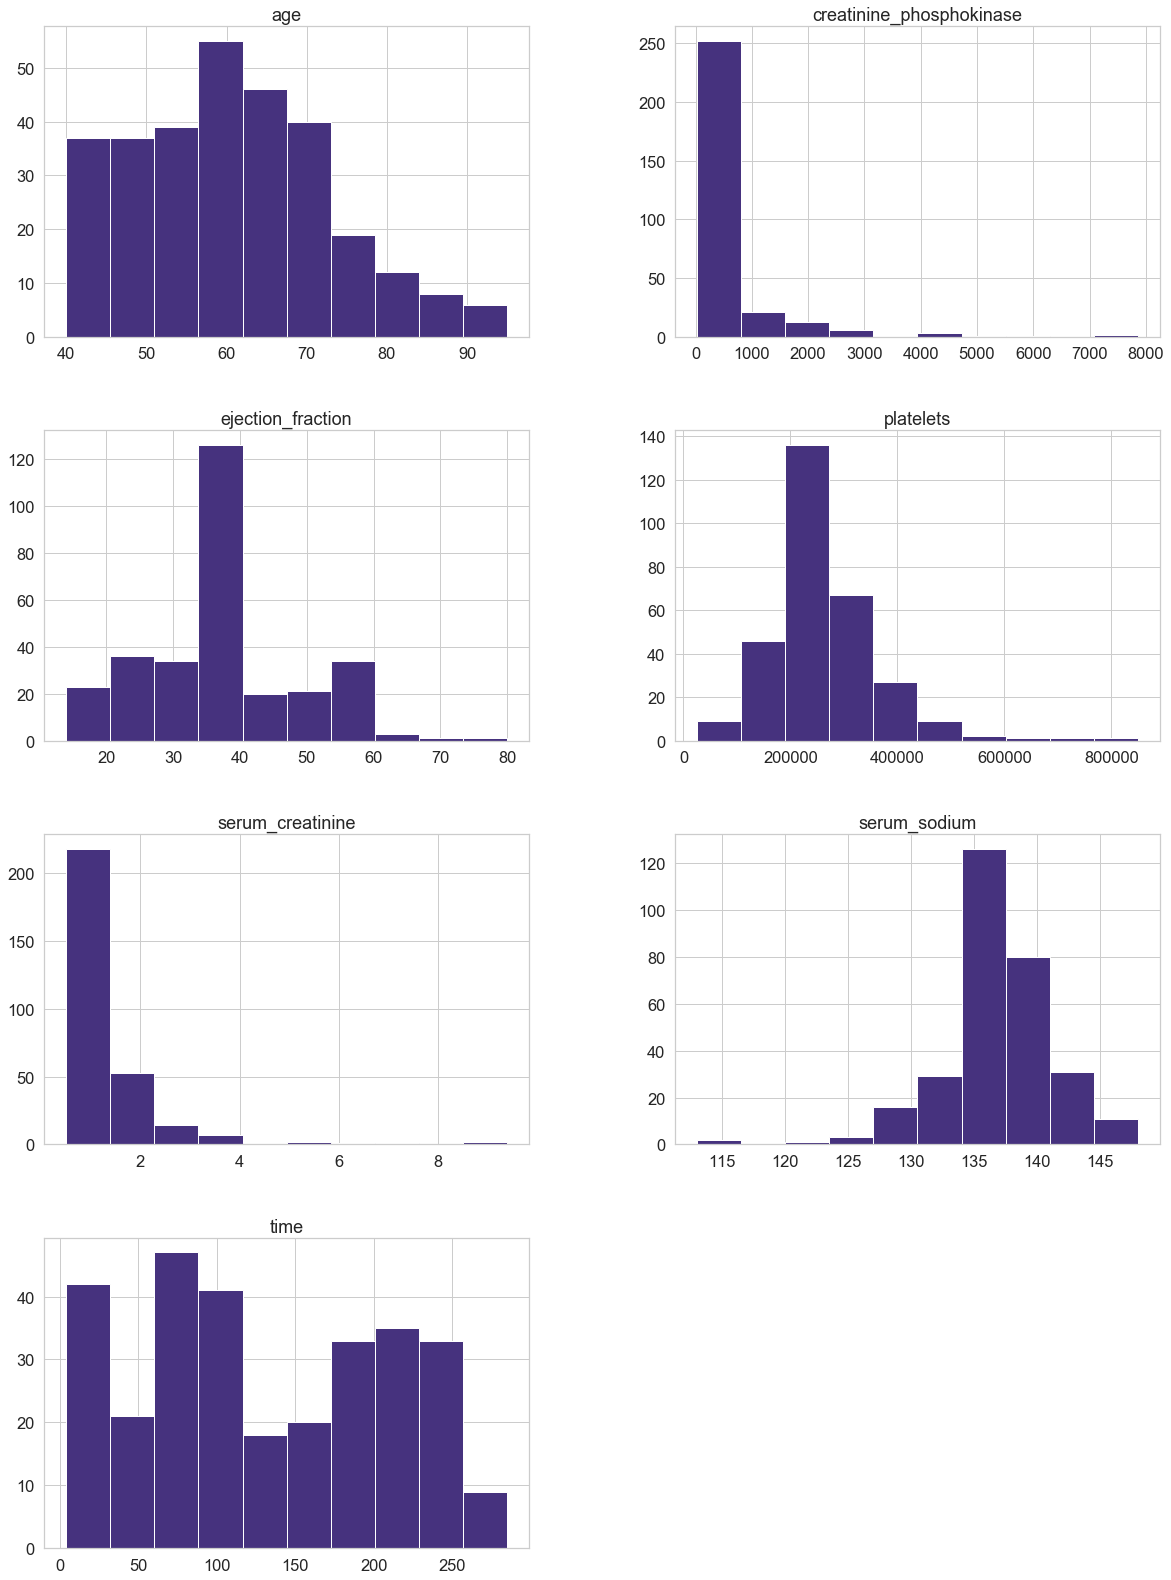

In [15]:
hf_data_EDA[numerical].hist(bins=10,figsize=(20, 28), layout=(4, 2))

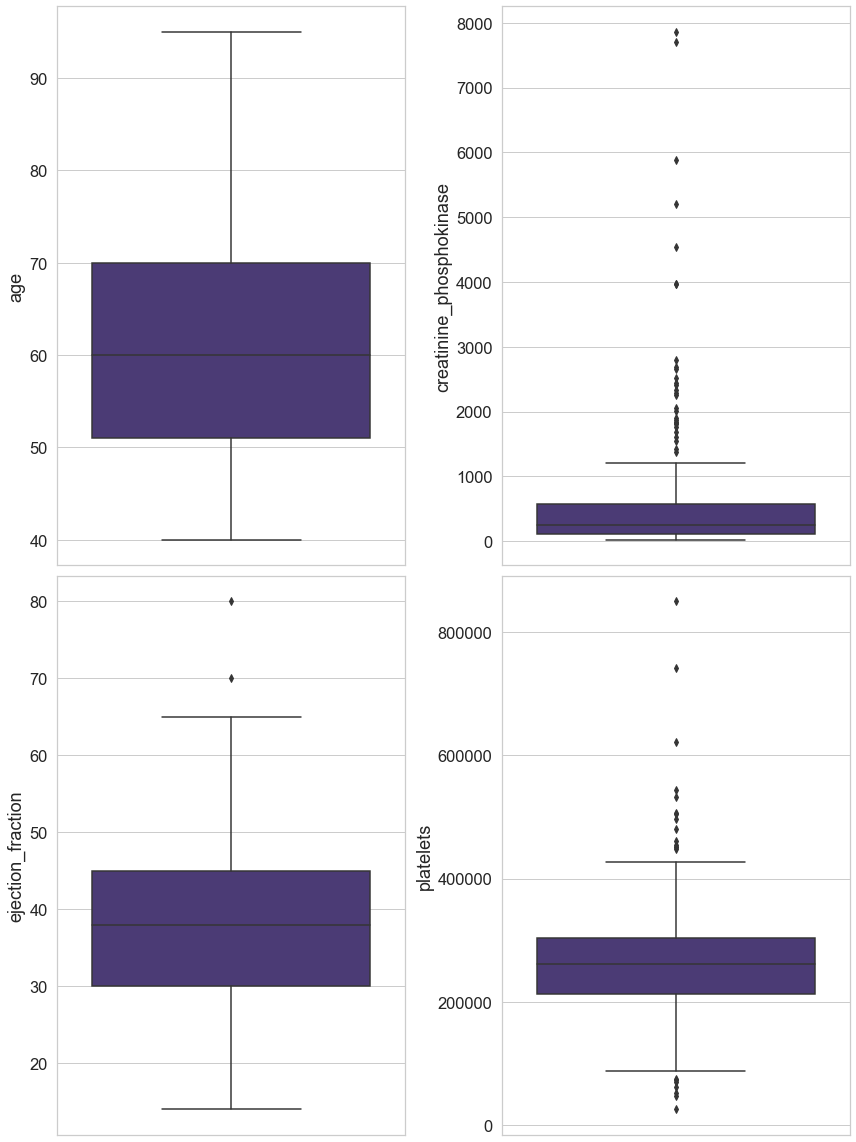

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(12, 16))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(y = hf_data_EDA[variable], ax=subplot)
fig.tight_layout()

There are large number of outliers in creatinine_phosphokinase and plateletes. To deal with this we can use transformations. Also, before feeding this data into our model we can scale the dataset to minimize its effect. 

**Categorical Features**

In [17]:
print(px.colors.sequential.Viridis)

['#440154', '#482878', '#3e4989', '#31688e', '#26828e', '#1f9e89', '#35b779', '#6ece58', '#b5de2b', '#fde725']


In [18]:
ds = hf_data['anaemia'].value_counts().reset_index()
ds.columns = ['anaemia', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="anaemia", 
    title='Anaemia pie chart',
    color = "anaemia",
    color_discrete_map={0:'#440154',1:'#31688e'}
    
)

fig.show()

In [19]:
ds = hf_data['diabetes'].value_counts().reset_index()
ds.columns = ['diabetes', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="diabetes", 
    title='Diabetes pie chart',
    color = "diabetes",
    color_discrete_map={0:'#440154',1:'#31688e'}
    
)

fig.show()

In [20]:
ds = hf_data['high_blood_pressure'].value_counts().reset_index()
ds.columns = ['high_blood_pressure', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="high_blood_pressure", 
    title='High bp pie chart',
    color = "high_blood_pressure",
    color_discrete_map={0:'#440154',1:'#31688e'}
    
)

fig.show()

In [21]:
ds = hf_data['sex'].value_counts().reset_index()
ds.columns = ['sex', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names="sex", 
    title='Sex pie chart',
    color = "sex",
    color_discrete_map={0:'#440154',1:'#31688e'}
    
)

fig.show()

In [22]:
ds = hf_data['smoking'].value_counts().reset_index()
ds.columns = ['smoking', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names='smoking', 
    title='Smoking pie chart',
    color = "smoking",
    color_discrete_map={0:'#440154',1:'#31688e'}
    
)

fig.show()

In [23]:
ds = hf_data['DEATH_EVENT'].value_counts().reset_index()
ds.columns = ['DEATH_EVENT', 'count']

fig = px.pie(
    ds, 
    values='count', 
    names='DEATH_EVENT', 
    title='Death Event pie chart',
    color = 'DEATH_EVENT',
    color_discrete_map={0:'#440154',1:'#31688e'}
    
)

fig.show()

In [24]:
#fig, ax = plt.subplots(2, 3,figsize=(20, 18))
#for variable, subplot in zip(categorical, ax.flatten()):
    #sns.countplot(hf_data_EDA[variable], ax=subplot)

### 2.1.2 Bivariate Analysis

**Numerical Features**

**Correlation**

In [25]:
hf_data_EDA[numerical].corr()

age  creatinine_phosphokinase  \
age                       1.000000                 -0.081406   
creatinine_phosphokinase -0.081406                  1.000000   
ejection_fraction         0.060195                 -0.044080   
platelets                -0.052475                  0.024463   
serum_creatinine          0.159237                 -0.016408   
serum_sodium             -0.045912                  0.059550   
time                     -0.224265                 -0.009346   

                          ejection_fraction  platelets  serum_creatinine  \
age                                0.060195  -0.052475          0.159237   
creatinine_phosphokinase          -0.044080   0.024463         -0.016408   
ejection_fraction                  1.000000   0.072177         -0.011302   
platelets                          0.072177   1.000000         -0.041198   
serum_creatinine                  -0.011302  -0.041198          1.000000   
serum_sodium                       0.175902   0.062125         -0.189095   
time                               0.041729   0.010514         -0.149315   

                          serum_sodium      time  
age                          -0.045912 -0.224265  
creatinine_phosphokinase      0.059550 -0.009346  
ejection_fraction             0.175902  0.041729  
platelets                     0.062125  0.010514  
serum_creatinine             -0.189095 -0.149315  
serum_sodium                  1.000000  0.087640  
time                          0.087640  1.000000

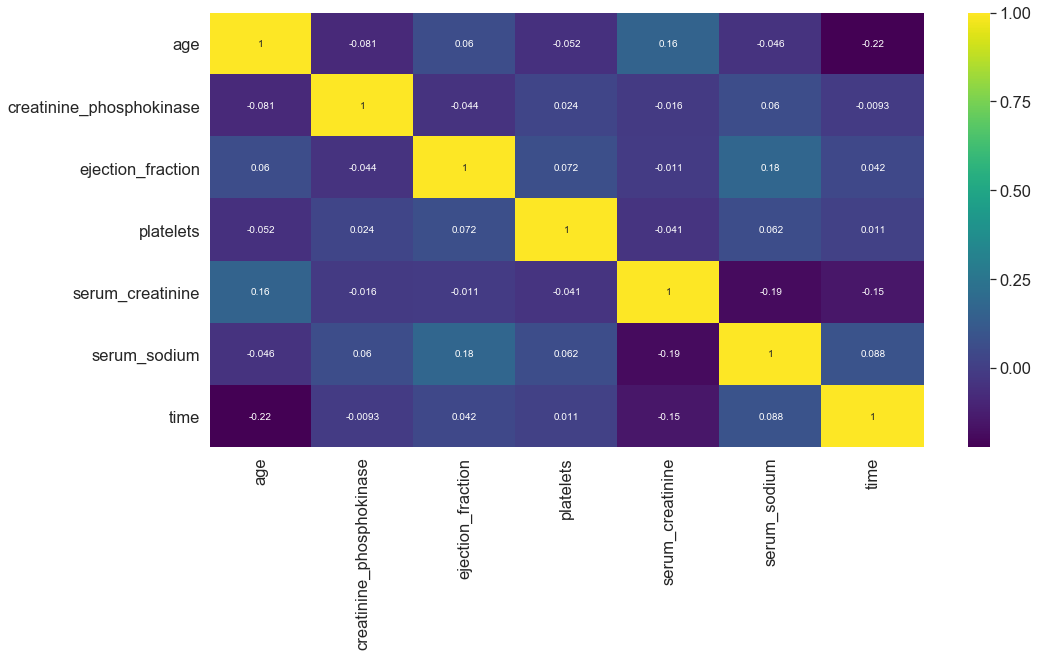

In [26]:
plt.subplots(figsize = (16,8))
sns.heatmap(hf_data_EDA[numerical].corr(), cmap = "viridis", annot=True)

The numeric Independent variables are not highly correlated. This is good as it indicates absence of multicollinearity

**Analysis with target variable**

Our objective is to predict Death Event. Analysis of the features with target variable could give us insights into the effect they could have on our predictions.

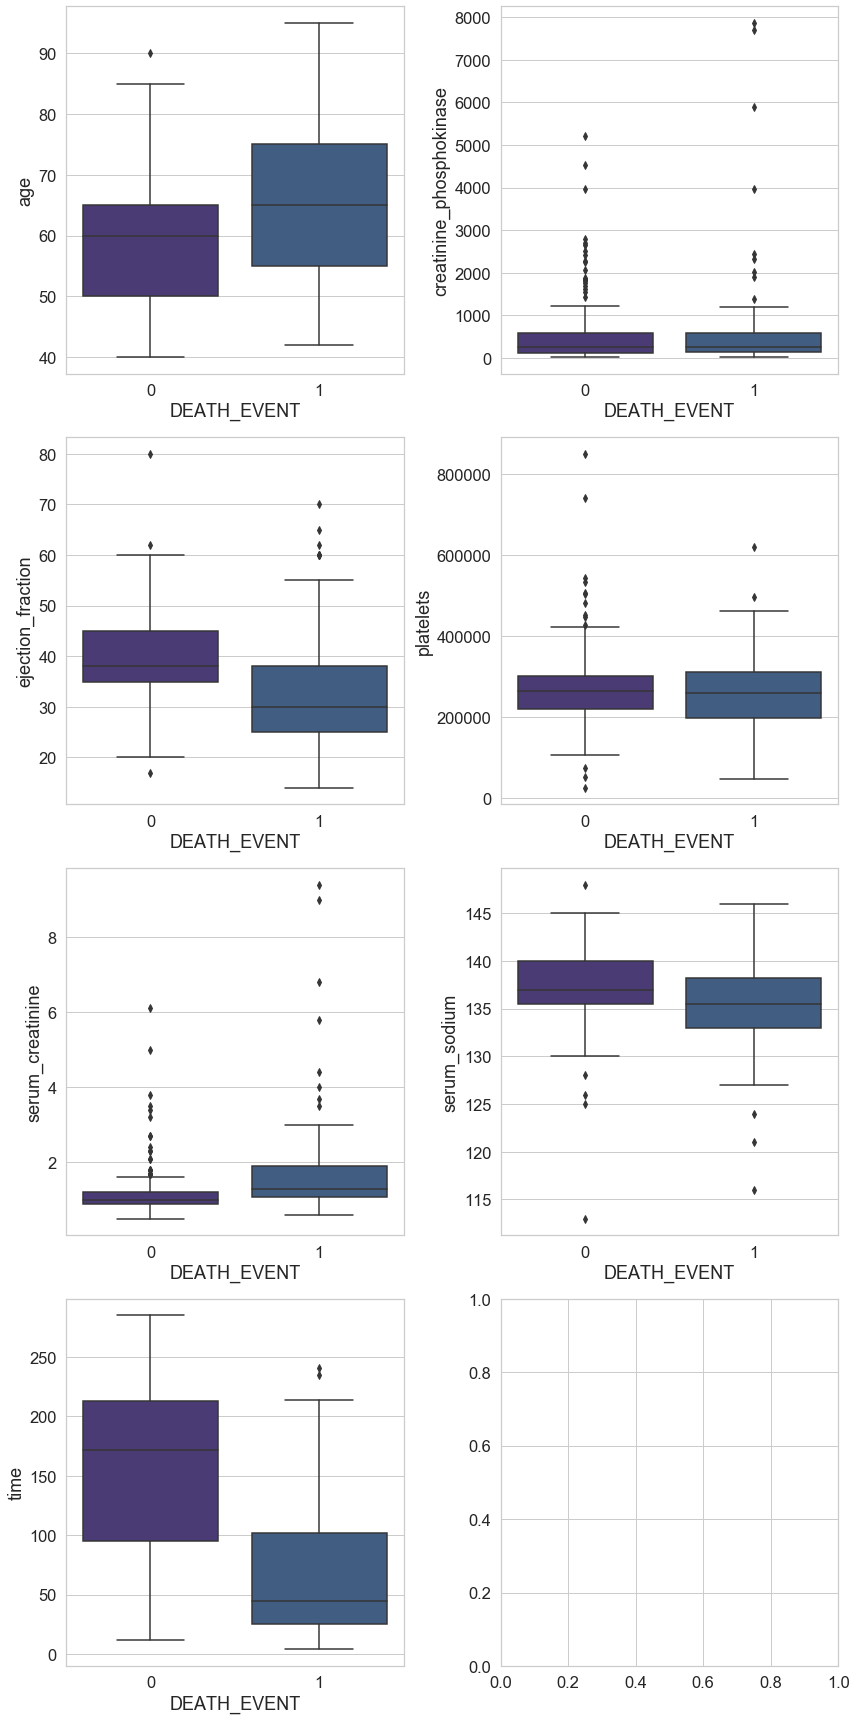

In [27]:
fig, ax = plt.subplots(4, 2, figsize=(12, 24))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x = hf_data['DEATH_EVENT'] , y = hf_data_EDA[variable], ax=subplot)
fig.tight_layout()

**Categorical Features**

In [28]:
hf_data_EDA[categorical].columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT'],
      dtype='object')

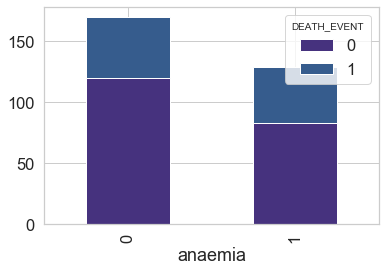

In [29]:
counts = hf_data.groupby(['anaemia', 'DEATH_EVENT']).anaemia.count().unstack()
counts.plot(kind='bar', stacked=True)

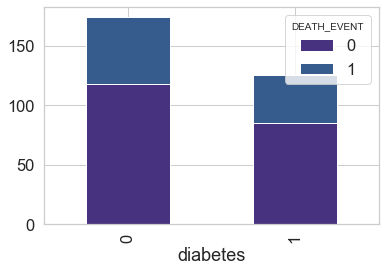

In [30]:
counts = hf_data.groupby(['diabetes', 'DEATH_EVENT']).diabetes.count().unstack()
counts.plot(kind='bar', stacked=True)

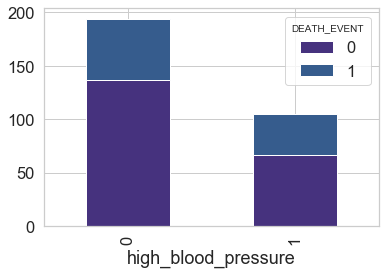

In [31]:
counts = hf_data.groupby(['high_blood_pressure', 'DEATH_EVENT']).high_blood_pressure.count().unstack()
counts.plot(kind='bar', stacked=True)

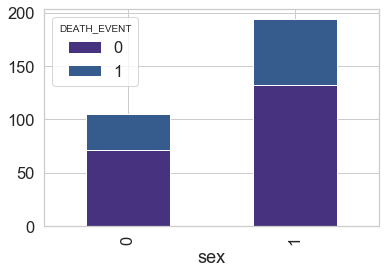

In [32]:
counts = hf_data.groupby(['sex', 'DEATH_EVENT']).sex.count().unstack()
counts.plot(kind='bar', stacked=True)

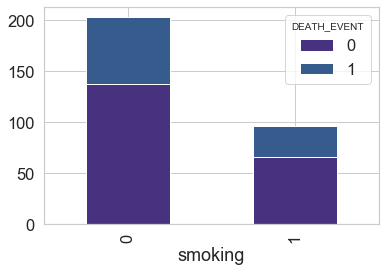

In [33]:
counts = hf_data.groupby(['smoking', 'DEATH_EVENT']).smoking.count().unstack()
counts.plot(kind='bar', stacked=True)

### 2.1.3 Multivariate Analysis

In [34]:
num_mva = hf_data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine',
                  'serum_sodium','time', 'DEATH_EVENT']]

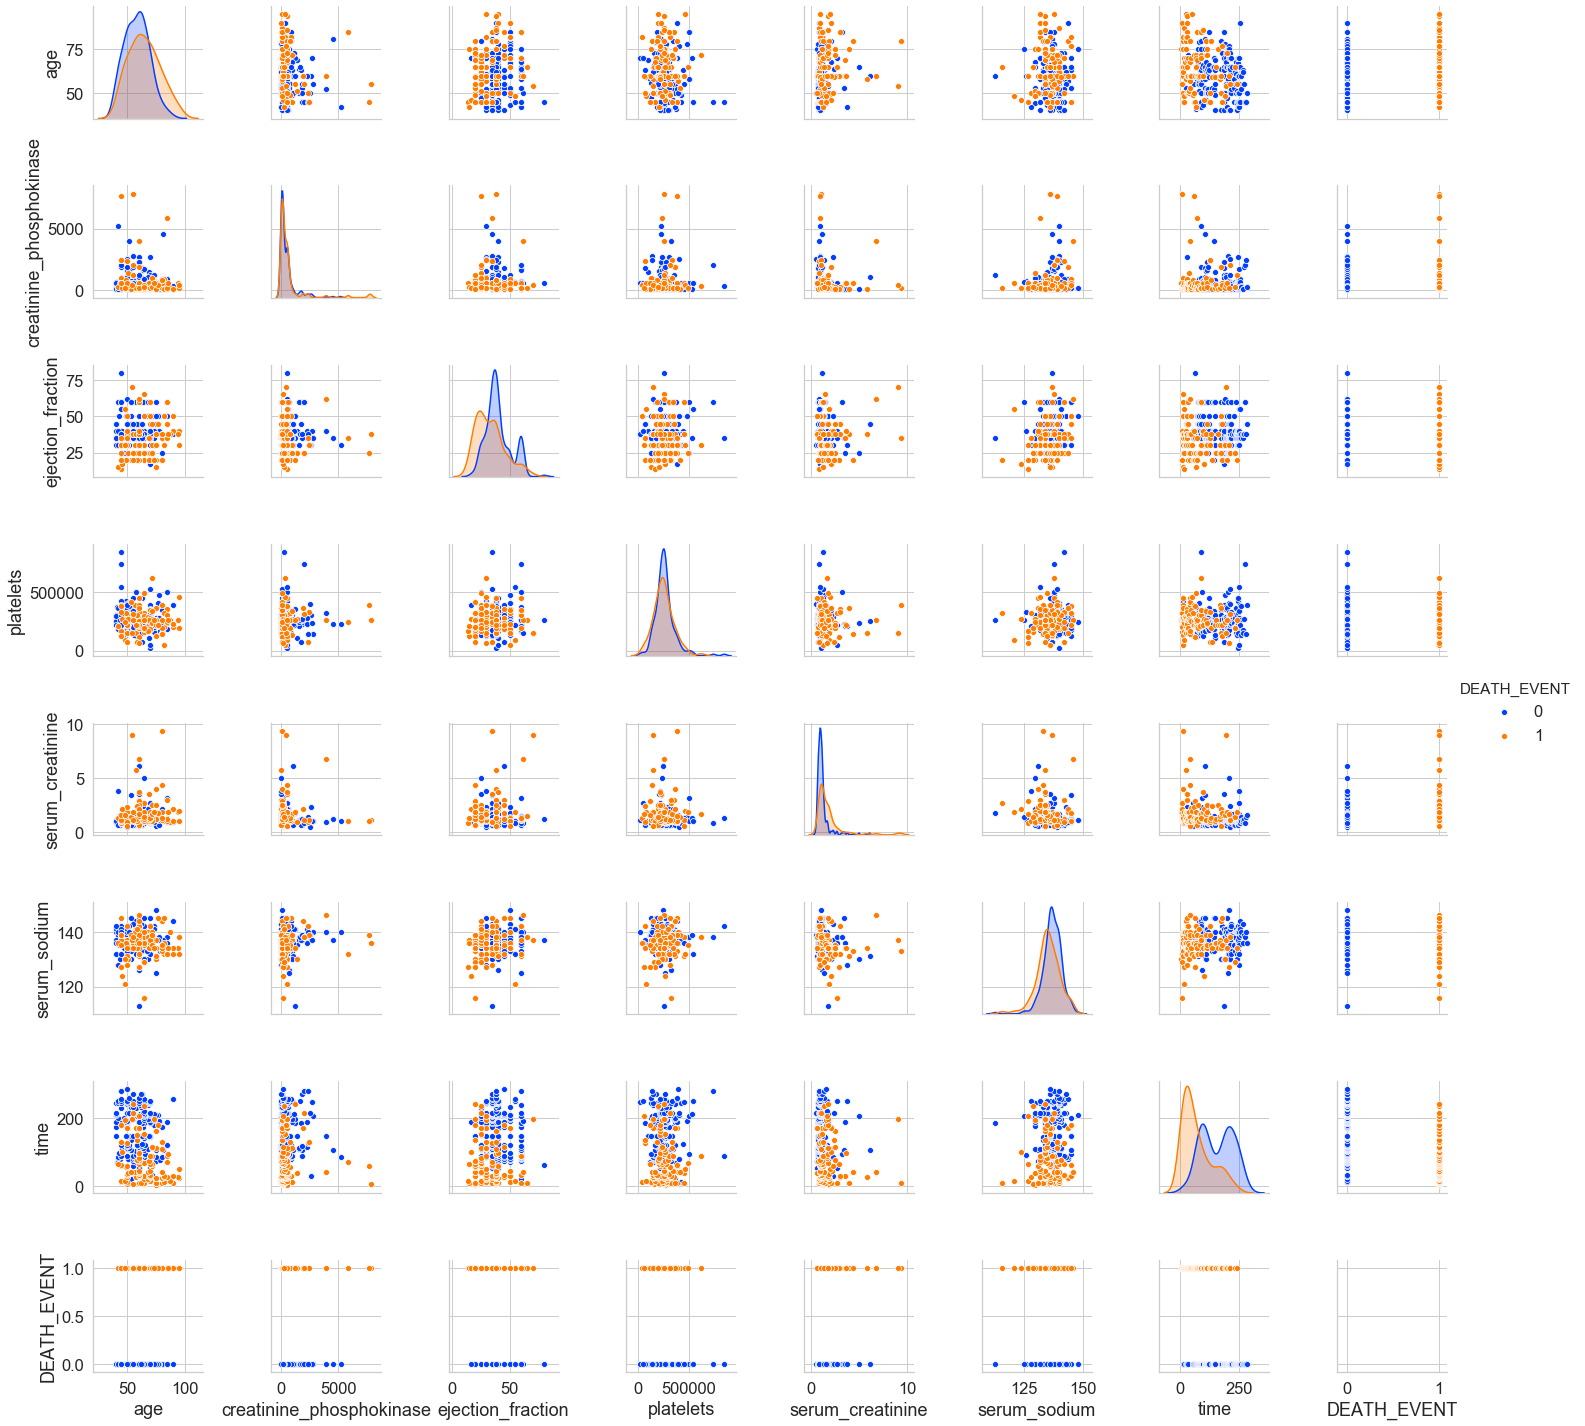

In [35]:
sns.pairplot(num_mva,palette = 'bright',hue='DEATH_EVENT')

## 2.2 Hypotheis testing

### 2.2.1 Numerical Variables

For comparing the distrbituion of numeric features across target variable we have used the Mann-Whitney test. 
It is the non-parametric equivalent of the independent samples t-test. This test has no underlying assumption regarding the normal distribution of data unlinke t-test[8].

H0: There is no statiscally significant difference between the samples <br>
H1: There is statiscally significant difference between the samples

**Age**

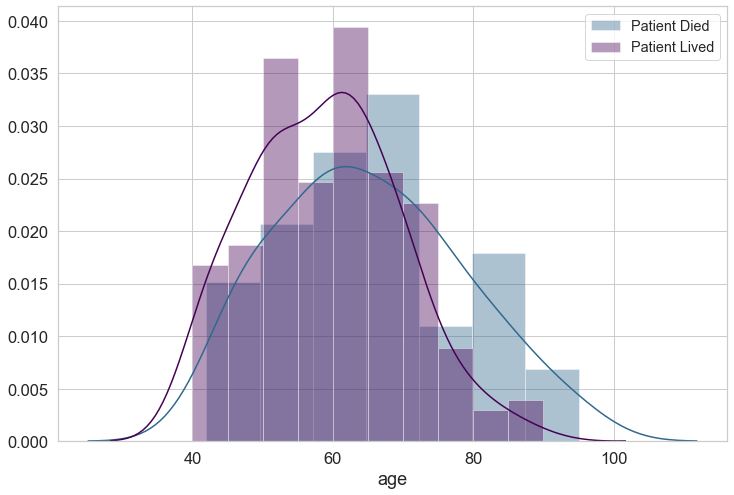

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 1]['age'],color = '#31688e', kde=True, norm_hist = False,label = 'Patient Died')
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 0]['age'],color = '#440154',kde=True, norm_hist = False,label = 'Patient Lived')
plt.legend(fontsize = "x-large")

In [37]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

patient_died = hf_data[hf_data['DEATH_EVENT'] == 1]['age']
patient_lived = hf_data[hf_data['DEATH_EVENT'] == 0]['age']

print("patient died: ",round(patient_died.mean(),2))
print("patient lived: ",round(patient_lived.mean(),2))

# comparing samples
stat, p = mannwhitneyu(patient_died, patient_lived)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

patient died:  65.21
patient lived:  58.76
Statistics=7124.500, p=0.000
Different distribution (reject H0)


The patients who died are relatively older.

**Creatinine Phosphokinase**

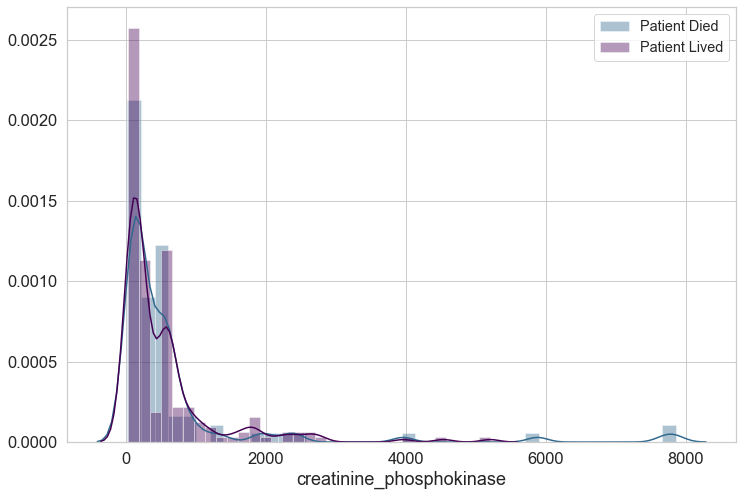

In [38]:
plt.figure(figsize=(12,8))
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 1]['creatinine_phosphokinase'],color = '#31688e', kde=True, norm_hist = False,label = 'Patient Died')
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 0]['creatinine_phosphokinase'],color = '#440154',kde=True, norm_hist = False,label = 'Patient Lived')
plt.legend(fontsize = "x-large")

In [39]:
patient_died = hf_data[hf_data['DEATH_EVENT'] == 1]['creatinine_phosphokinase']
patient_lived = hf_data[hf_data['DEATH_EVENT'] == 0]['creatinine_phosphokinase']

print("patient died: ",round(patient_died.mean(),2))
print("patient lived: ",round(patient_lived.mean(),2))

# comparing samples
stat, p = mannwhitneyu(patient_died, patient_lived)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

patient died:  670.2
patient lived:  540.05
Statistics=9460.000, p=0.342
Same distribution (fail to reject H0)


The level of CPK enzyme is not higher among patients who died .

**Ejection Fraction**

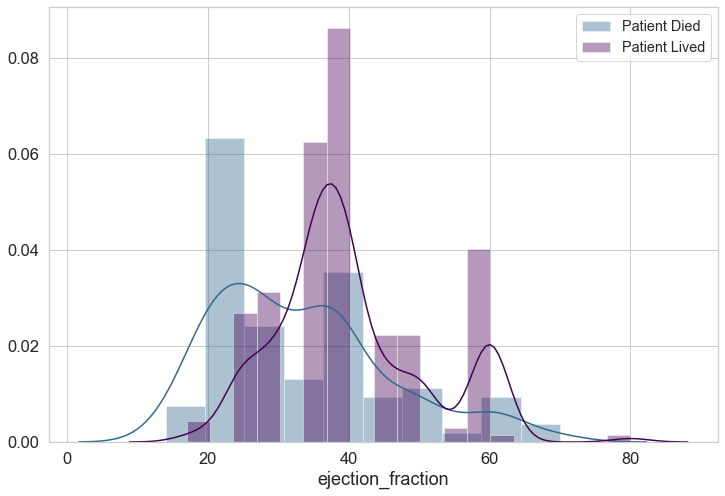

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 1]['ejection_fraction'],color = '#31688e', kde=True, norm_hist = False,label = 'Patient Died')
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 0]['ejection_fraction'],color = '#440154',kde=True, norm_hist = False,label = 'Patient Lived')
plt.legend(fontsize = "x-large")

In [41]:
patient_died = hf_data[hf_data['DEATH_EVENT'] == 1]['ejection_fraction']
patient_lived = hf_data[hf_data['DEATH_EVENT'] == 0]['ejection_fraction']

print("patient died: ",round(patient_died.mean(),2))
print("patient lived: ",round(patient_lived.mean(),2))

# comparing samples
stat, p = mannwhitneyu(patient_died, patient_lived)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

patient died:  33.47
patient lived:  40.27
Statistics=6311.500, p=0.000
Different distribution (reject H0)


The ejection fraction was lower among the patients who died.

**Platelets**

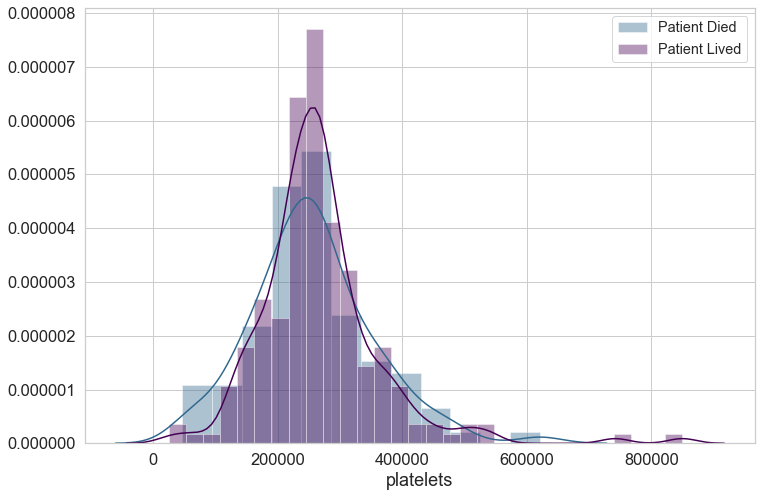

In [42]:
plt.figure(figsize=(12,8))
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 1]['platelets'],color = '#31688e', kde=True, norm_hist = False,label = 'Patient Died')
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 0]['platelets'],color = '#440154',kde=True, norm_hist = False,label = 'Patient Lived')
plt.legend(fontsize = "x-large")

In [43]:
patient_died = hf_data[hf_data['DEATH_EVENT'] == 1]['platelets']
patient_lived = hf_data[hf_data['DEATH_EVENT'] == 0]['platelets']

print("patient died: ",round(patient_died.mean(),2))
print("patient lived: ",round(patient_lived.mean(),2))

# comparing samples
stat, p = mannwhitneyu(patient_died, patient_lived)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

patient died:  256381.04
patient lived:  266657.49
Statistics=9187.500, p=0.213
Same distribution (fail to reject H0)


The difference between the average level of plateletes is isignificant.

**Serum Creatinine**

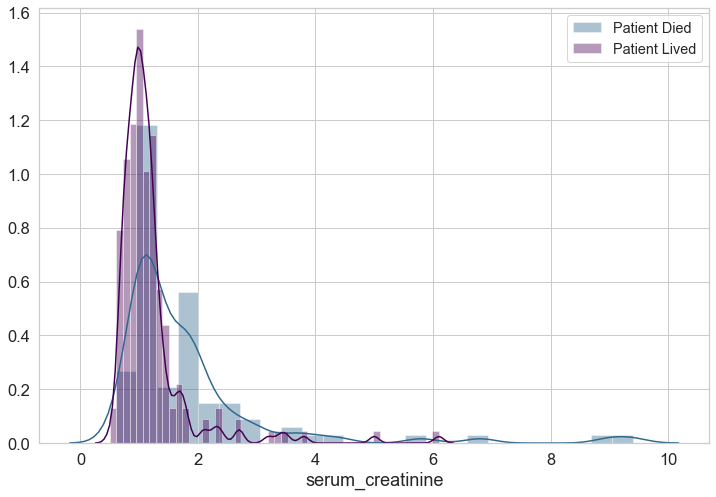

In [44]:
plt.figure(figsize=(12,8))
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 1]['serum_creatinine'],color = '#31688e', kde=True, norm_hist = False,label = 'Patient Died')
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 0]['serum_creatinine'],color = '#440154',kde=True, norm_hist = False,label = 'Patient Lived')
plt.legend(fontsize = "x-large")

In [45]:
patient_died = hf_data[hf_data['DEATH_EVENT'] == 1]['serum_creatinine']
patient_lived = hf_data[hf_data['DEATH_EVENT'] == 0]['serum_creatinine']

print("patient died: ",round(patient_died.mean(),2))
print("patient lived: ",round(patient_lived.mean(),2))

# comparing samples
stat, p = mannwhitneyu(patient_died, patient_lived)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

patient died:  1.84
patient lived:  1.18
Statistics=5298.000, p=0.000
Different distribution (reject H0)


The levels of serum creatinine was higher on average among the patients who died.

**Serum Sodium**

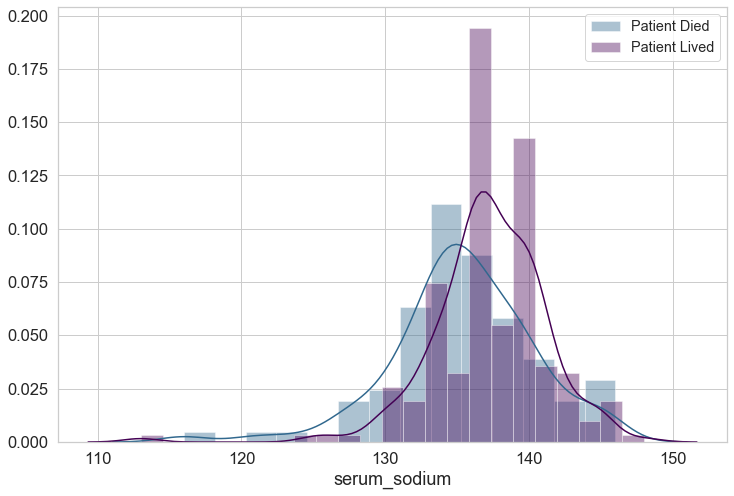

In [46]:
plt.figure(figsize=(12,8))
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 1]['serum_sodium'],color = '#31688e', kde=True, norm_hist = False,label = 'Patient Died')
sns.distplot(hf_data[hf_data['DEATH_EVENT'] == 0]['serum_sodium'],color = '#440154',kde=True, norm_hist = False,label = 'Patient Lived')
plt.legend(fontsize = "x-large")

In [47]:
patient_died = hf_data[hf_data['DEATH_EVENT'] == 1]['serum_sodium']
patient_lived = hf_data[hf_data['DEATH_EVENT'] == 0]['serum_sodium']

print("patient died: ",round(patient_died.mean(),2))
print("patient lived: ",round(patient_lived.mean(),2))

# comparing samples
stat, p = mannwhitneyu(patient_died, patient_lived)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpreting
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

patient died:  135.38
patient lived:  137.22
Statistics=7226.500, p=0.000
Different distribution (reject H0)


The levels of serum creatinine was lower on average among the patients who died.

### 2.2.2 Categorical Variables

Chi-square goodness of fit test is a non-parametric test used for comparing the observed distribution of data with the expected distribution of the data to decided whether there is any statistically significant difference between the observed distribution and a theoretical distribution.

H0:There is no difference between observed and expected frequencies<br>
HA:There is difference between observed and expected frequencies

**Anaemia**

In [48]:
tab = pd.crosstab(index = hf_data['anaemia'], columns = hf_data['DEATH_EVENT'])
print(tab) 

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

DEATH_EVENT    0   1
anaemia             
0            120  50
1             83  46
chi-sq-statistic:  1.0422  p-value: 0.3073  deg of freedom: 1
Retain Null Hypothesis


The relationship between anaemia and patient death is isignificant.

**Diabetes**

In [49]:
tab = pd.crosstab(index = hf_data['diabetes'], columns = hf_data['DEATH_EVENT'])
print(tab) 

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

DEATH_EVENT    0   1
diabetes            
0            118  56
1             85  40
chi-sq-statistic:  0.0085  p-value: 0.9267  deg of freedom: 1
Retain Null Hypothesis


The relationship between diabetes and patient death is isignificant.

**High Blood Pressure**

In [50]:
tab = pd.crosstab(index = hf_data['high_blood_pressure'], columns = hf_data['DEATH_EVENT'])
print(tab) 

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

DEATH_EVENT            0   1
high_blood_pressure         
0                    137  57
1                     66  39
chi-sq-statistic:  1.5435  p-value: 0.2141  deg of freedom: 1
Retain Null Hypothesis


The relationship between high blood pressure and patient death is isignificant.

**Sex**

In [51]:
tab = pd.crosstab(index = hf_data['sex'], columns = hf_data['DEATH_EVENT'])
print(tab) 

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

DEATH_EVENT    0   1
sex                 
0             71  34
1            132  62
chi-sq-statistic:  0.003  p-value: 0.9561  deg of freedom: 1
Retain Null Hypothesis


The relationship between sex and patient death is isignificant.

**Smoking**

In [52]:
tab = pd.crosstab(index = hf_data['smoking'], columns = hf_data['DEATH_EVENT'])
print(tab) 

from scipy.stats import chi2_contingency
stat, pvalue, dof, expected = chi2_contingency(tab, correction = True)

print( "chi-sq-statistic: ", round(stat, 4) , " p-value:", round(pvalue, 4), " deg of freedom:", dof )

if pvalue < 0.05:
   print ('Reject Null Hypothesis')
else:
   print ('Retain Null Hypothesis')

DEATH_EVENT    0   1
smoking             
0            137  66
1             66  30
chi-sq-statistic:  0.0073  p-value: 0.9318  deg of freedom: 1
Retain Null Hypothesis


The relationship between smoking and patient death is isignificant.

## 3.Modeling & Evaluation

The aim of our model would be to predict the event of patient's death. Since the outcome is categorical in nature, classification algorthims have been applied. 

**Seperating Dependent and Independent variables**

In [53]:
# followup period would automatically be less for patients who have died so it is redundant
# Deth Event is the Dependent Variable
features = hf_data.drop(['DEATH_EVENT','time'],axis=1) 
X_features = list(features.columns)

Y = hf_data.DEATH_EVENT

### 3.1 Logistic Regression

Logistic Regression using statsmodel package has been used.The statsmodel package includes well tabulated summary for the model. 

Advantages:
    <br>1. Easy interpretation
    <br>2. Probabilities of outcome can be estimated
    <br>3. Robust from overfitting
    <br>4. No assumptions pertaining to the distribution

In [54]:
# Adding a constant for Logistic model to work while using statmodels package
import statsmodels.api as sm
X = sm.add_constant(hf_data[X_features] )
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
const                       299 non-null float64
age                         299 non-null int64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
dtypes: float64(3), int64(9)
memory usage: 28.1 KB


In [55]:
# Splitting into Train and Validation Sets
# 80% Train, 20% Validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)

In [56]:
# Building the logistic regression model
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.455891
         Iterations 7


In [57]:
# Printing Model Summary
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.251     
Dependent Variable:    DEATH_EVENT        AIC:                241.9160  
Date:                  2020-10-15 09:04   BIC:                283.6336  
No. Observations:      239                Log-Likelihood:     -108.96   
Df Model:              11                 LL-Null:            -145.40   
Df Residuals:          227                LLR p-value:        3.4498e-11
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     2.8202   5.3507  0.5271 0.5981 -7.6669 13.3073
age                       0.0681   0.0156  4.3569 0.0000  0.0375  0.0987
anaemia                   0.3699   0.3517  1.0517 0.2930 -0.3195  1.0593
creatinine_phosphokinase  0.0002   0.0002  1.3940 0.1633 -0.0001  0.0006
diabetes                  0.2971   0.3548  0.8372 0.4025 -0.3984  0.9925
ejection_fraction        -0.0784   0.0182 -4.3058 0.0000 -0.1141 -0.0427
high_blood_pressure       0.4646   0.3602  1.2901 0.1970 -0.2413  1.1705
platelets                -0.0000   0.0000 -0.8947 0.3710 -0.0000  0.0000
serum_creatinine          0.7502   0.1955  3.8366 0.0001  0.3670  1.1335
serum_sodium             -0.0440   0.0383 -1.1485 0.2508 -0.1192  0.0311
sex                      -0.6644   0.4042 -1.6438 0.1002 -1.4566  0.1278
smoking                   0.1689   0.4128  0.4091 0.6824 -0.6402  0.9780
========================================================================

"""

In [58]:
# Model Dignostics
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [59]:
# Significant Variables
significant_vars = get_significant_vars( logit_model )
significant_vars

['age', 'ejection_fraction', 'serum_creatinine']

In [60]:
# Rebuilding the model with significant variables
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.475253
         Iterations 6


In [61]:
# Printing Model Summary
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.219     
Dependent Variable: DEATH_EVENT      AIC:              235.1710  
Date:               2020-10-15 09:04 BIC:              249.0768  
No. Observations:   239              Log-Likelihood:   -113.59   
Df Model:           3                LL-Null:          -145.40   
Df Residuals:       235              LLR p-value:      9.8669e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -3.1110   1.0023 -3.1037 0.0019 -5.0755 -1.1464
age                0.0614   0.0144  4.2504 0.0000  0.0331  0.0896
ejection_fraction -0.0734   0.0171 -4.3002 0.0000 -0.1069 -0.0399
serum_creatinine   0.7433   0.1756  4.2331 0.0000  0.3991  1.0874
=================================================================

"""

In [62]:
# Predicting probabilities on Test Data
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) 
                          } )
y_pred_df.predicted_prob.head(8)

281    0.563221
265    0.125246
164    0.149984
9      0.998004
77     0.070533
278    0.151192
93     0.499640
109    0.124214
Name: predicted_prob, dtype: float64

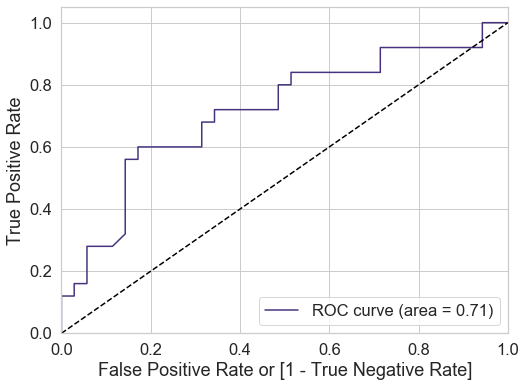

auc_score: 0.71


In [63]:
from sklearn import metrics
# RoC Curve

# RoC Curve can be used to understand the overall performance of a logistic regression model and used for model selection
# RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)]
# Higher the AUC, better the model
# AUC < 0.5 model is inferior to a case of having no model
# AUC > 0.7 model is useful

def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

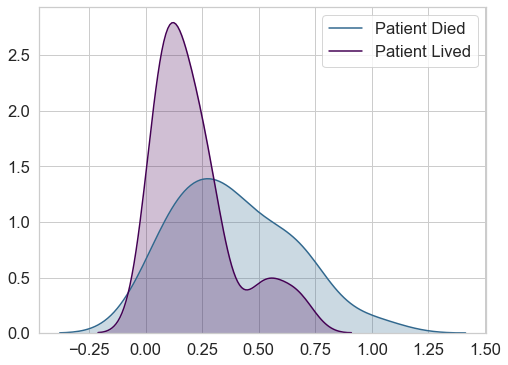

In [64]:
# Identifying the right probability
plt.figure( figsize = (8,6) )
sns.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = '#31688e', shade=True,label = 'Patient Died' )
sns.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = '#440154', shade=True,label = 'Patient Lived' )
plt.legend()
plt.show()

Y Predicted
0    34
1    26
Name: predicted, dtype: int64

Y Actual
0    35
1    25
Name: actual, dtype: int64

confusion matrix
[[24 11]
 [10 15]]


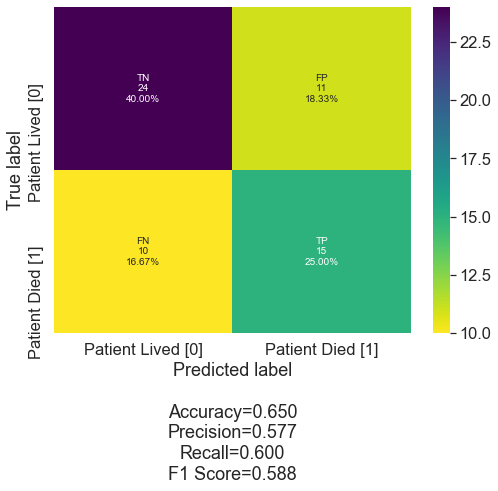

In [65]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.25 else 0)

print("Y Predicted")
print(y_pred_df.predicted.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
from cf_matrix import make_confusion_matrix

cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [0,1] )
print(cm)

labels = ["TN","FP","FN","TP"]
categories = ["Patient Lived [0]","Patient Died [1]"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap="viridis_r", figsize =(8,6))

Y Predicted
0    32
1    28
Name: predicted, dtype: int64

Y Actual
0    35
1    25
Name: actual, dtype: int64

confusion matrix
[[24 11]
 [ 8 17]]


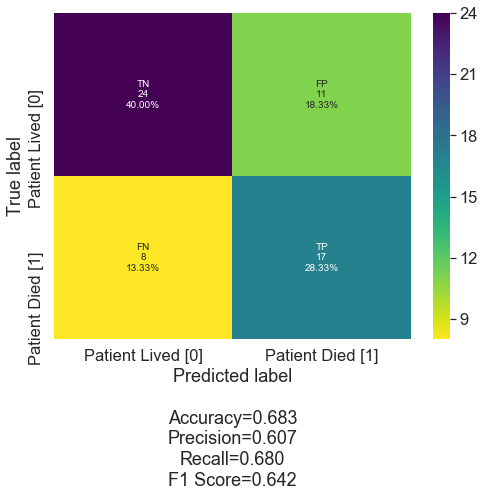

In [66]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.23 else 0)

print("Y Predicted")
print(y_pred_df.predicted.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
from cf_matrix import make_confusion_matrix

cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.predicted, [0,1] )
print(cm)

labels = ["TN","FP","FN","TP"]
categories = ["Patient Lived [0]","Patient Died [1]"]
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap="viridis_r", figsize =(8,6))

In [67]:
# Measuring Performance
from sklearn.metrics import classification_report
print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))
report = classification_report(y_pred_df.actual, y_pred_df.predicted, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("lr_report.csv")

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        35
           1       0.61      0.68      0.64        25

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.69      0.68      0.69        60



### 3.2  Naive-Bayes Classifier

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

Advantages:
<br> 1. Works well when non-linearity is present
<br> 2. Requires less computational power

Continous independent variables should hold normal distribution

In [68]:
# normalizing continous variables
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium']
X_train[cols_to_norm] = StandardScaler().fit_transform(X_train[cols_to_norm])

In [69]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

In [70]:
# Identifying optimal probability
X_test[cols_to_norm] = StandardScaler().fit_transform(X_test[cols_to_norm])
gnb_predict = gnb.predict_proba( X_test )
gnb_predict = pd.DataFrame(gnb_predict)[1]
gnb_predict = gnb_predict.to_numpy()

In [71]:
# Gathering probabilities
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": gnb_predict 
                          } )
y_pred_df.sample(10, random_state = 42)

actual  predicted_prob
281       0        0.446598
278       0        0.079912
113       1        0.090714
197       0        0.088991
154       0        0.138343
277       0        0.125230
24        1        0.442423
219       0        0.049599
184       1        0.074531
25        1        0.248535

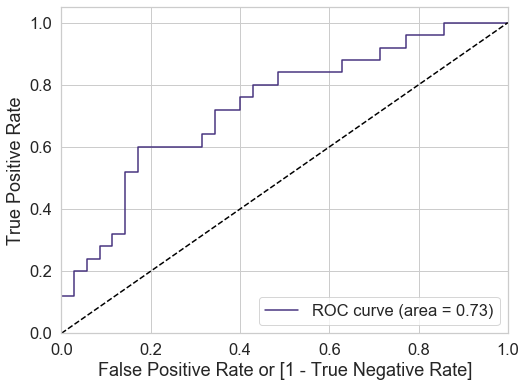

0.73

In [72]:
# Plotting AUC 
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

# Measuring Test Accuracy
round(metrics.roc_auc_score( y_test, y_pred_df.predicted_prob),2)

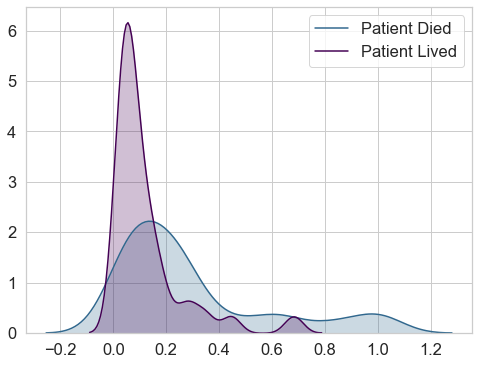

In [73]:
# Identifying the right probability
plt.figure( figsize = (8,6) )
sns.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = '#31688e', shade=True,label = 'Patient Died' )
sns.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = '#440154', shade=True,label = 'Patient Lived' )
plt.legend()
plt.show()

Y Predicted
0    40
1    20
Name: gnb_predict, dtype: int64

Y Actual
0    35
1    25
Name: actual, dtype: int64

confusion matrix
[[29  6]
 [11 14]]


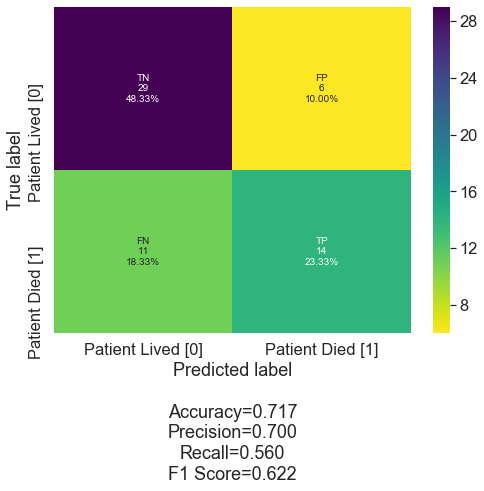

In [74]:
y_pred_df['gnb_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.18 else 0)

print("Y Predicted")
print(y_pred_df.gnb_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.gnb_predict, [0,1] )
print(cm)

cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.gnb_predict)
labels = ["TN","FP","FN","TP"]
categories = ["Patient Lived [0]","Patient Died [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="viridis_r",figsize=(8,6))

Y Predicted
0    42
1    18
Name: gnb_predict, dtype: int64

Y Actual
0    35
1    25
Name: actual, dtype: int64

confusion matrix
[[30  5]
 [12 13]]


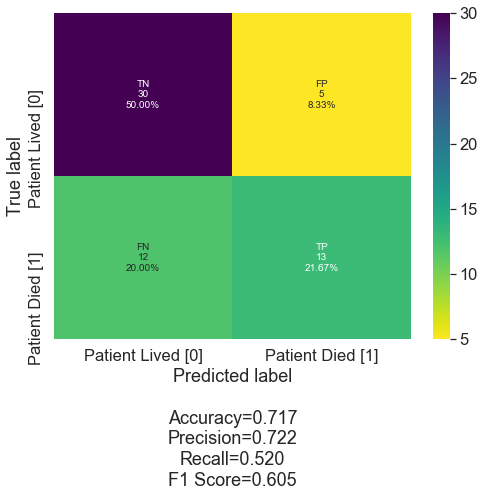

In [75]:
y_pred_df['gnb_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.20 else 0)

print("Y Predicted")
print(y_pred_df.gnb_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.gnb_predict, [0,1] )
print(cm)

cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.gnb_predict)
labels = ["TN","FP","FN","TP"]
categories = ["Patient Lived [0]","Patient Died [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="viridis_r",figsize=(8,6))

In [76]:
# Measuring Performance
from sklearn.metrics import classification_report
print(metrics.classification_report(y_pred_df.actual, y_pred_df.gnb_predict))
report = classification_report(y_pred_df.actual, y_pred_df.gnb_predict, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv("nb_report.csv")

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.72      0.52      0.60        25

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.69        60
weighted avg       0.72      0.72      0.71        60



### 3.3 K- Nearest Neighbors classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
# Training the model
knnmodel = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [78]:
# Predicting the output
knn_predict= knnmodel.predict(X_test)

Y Predicted
0    49
1    11
Name: knn_predict, dtype: int64

Y Actual
0    35
1    25
Name: actual, dtype: int64

confusion matrix
[[32  3]
 [17  8]]


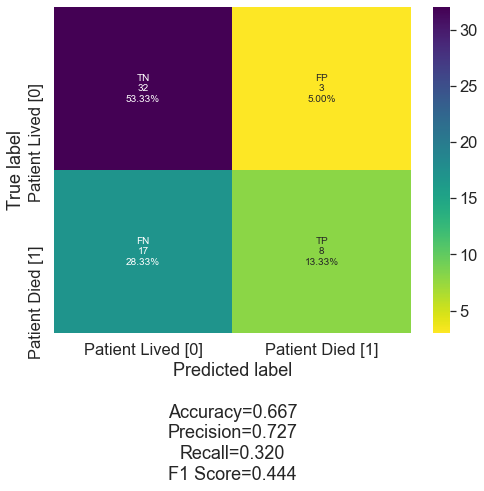

In [79]:
y_pred_df['knn_predict'] = knn_predict

print("Y Predicted")
print(y_pred_df.knn_predict.value_counts())
print("")
print("Y Actual")
print(y_pred_df.actual.value_counts())
print("")
print("confusion matrix")
cm = metrics.confusion_matrix( y_pred_df.actual, y_pred_df.knn_predict, [0,1] )
print(cm)

cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.knn_predict)
labels = ["TN","FP","FN","TP"]
categories = ["Patient Lived [0]","Patient Died [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="viridis_r",figsize=(8,6))

In [80]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['knn_predict'] ) )

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        35
           1       0.73      0.32      0.44        25

    accuracy                           0.67        60
   macro avg       0.69      0.62      0.60        60
weighted avg       0.68      0.67      0.63        60



### 3.4 Results
<br>**Logistic Regression**: AUC -    0.71  ; Accuracy 0.68 ; Sensitivity 0.68 ; Specificity  0.69 ;Precision 0.61
<br>**N-Bayes**            : AUC -    0.73  ; Accuracy 0.72 ; Sensitivity 0.56 ; Specificity  0.83 ;Precision 0.72
<br>**KNN**                : AUC -    NA    ; Accuracy 0.53 ; Sensitivity 0.16 ; Specificity  0.80 ;Precision 0.36**

# References




1. Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5 <br><br>
2. Ahmad T, Munir A, Bhatti SH, Aftab M, Raza MA. Survival analysis of heart failure patients: a case study. PLoS ONE. 2017; 12(7):0181001.<br><br>
3. Johns Hopkins Rheumatology. Creatine Phosphokinase (CPK). https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/.<br><br>
4. Ejection Fraction Heart Failure Measurement | American Heart.https://www.heart.org/en/health-topics/heart-failure/diagnosing-heart-failure/ejection-fraction-heart-failure-measurement<br><br>
5. Platelets and Cardiovascular Disease - AHA Journals.https://www.ahajournals.org/doi/full/10.1161/01.CIR.0000086897.15588.4B<br><br>
6.  Increase in Creatinine and Cardiovascular Risk in Patients ....from https://jasn.asnjournals.org/content/17/10/2886 <br><br>
7. Case-Lo C. What is a sodium blood test?https://www.healthline.com/health/sodium-blood.<br><br>
8. Mann-Whitney test (independent samples) - MedCalc." https://www.medcalc.org/manual/mannwhitney.php.<br><br>
9. Chi-Square Goodness of Fit Test - Statistics Solutions.https://www.statisticssolutions.com/chi-square-goodness-of-fit-test/